In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import KFold

In [6]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import math as math

In [236]:
reservas = pd.read_csv('/content/sample_data/reservas_export.csv')

In [237]:
test = pd.read_csv('/content/sample_data/hotels_test.csv')

In [238]:
reservas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58869 entries, 0 to 58868
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      58869 non-null  int64  
 1   hotel                           58869 non-null  object 
 2   lead_time                       58869 non-null  int64  
 3   arrival_date_year               58869 non-null  int64  
 4   arrival_date_month              58869 non-null  object 
 5   arrival_date_week_number        58869 non-null  int64  
 6   arrival_date_day_of_month       58869 non-null  int64  
 7   stays_in_weekend_nights         58869 non-null  int64  
 8   stays_in_week_nights            58869 non-null  int64  
 9   adults                          58869 non-null  int64  
 10  children                        58869 non-null  float64
 11  babies                          58869 non-null  int64  
 12  meal                            

Preprocesamiento de los datasets

In [239]:
test = test.drop(columns = 'reservation_status_date')
reservas = reservas.drop(columns = ['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','meal'])
test = test.drop(columns = ['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','meal'])

# igualacion Dummies variable Country

In [240]:
reservas_c = (sorted(reservas["country"].dropna().unique()))
test_c = (sorted(test["country"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [241]:
reservas_limpio = pd.get_dummies(reservas, columns=["country"], drop_first=True, dtype='int64')

In [242]:
for country in paises_no_train:

  reservas_limpio["country_" + country] = np.int64(0)

In [243]:
test_limpio = pd.get_dummies(test, columns=["country"], drop_first=True, dtype='int64')

In [244]:
for country in paises_no_test:

  test_limpio["country_" + country] = np.int64(0)

In [245]:
reservas_limpio = reservas_limpio.drop(columns = 'Unnamed: 0')

In [246]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [247]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable hotel

In [248]:
reservas_h = (sorted(reservas_limpio["hotel"].dropna().unique()))
test_h = (sorted(test_limpio["hotel"].dropna().unique()))
paises_no_test = list(set(reservas_h) - set(test_h))
paises_no_train = list(set(test_h) - set(reservas_h))


In [249]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["hotel"], drop_first=True, dtype='int64')

In [250]:
for hotel in paises_no_train:
  hotel_ = hotel.replace(" ","_")
  reservas_limpio["hotel_" + hotel_] = np.int64(0)

In [251]:
test_limpio = pd.get_dummies(test_limpio, columns=["hotel"], drop_first=True, dtype='int64')

In [252]:
for hotel in paises_no_test:
  hotel_ = hotel.replace(" ","_")
  test_limpio["hotel_" + hotel_] = np.int64(0)

In [253]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [254]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable arrival_date_month

In [27]:
reservas_c = (sorted(reservas_limpio["arrival_date_month"].dropna().unique()))
test_c = (sorted(test_limpio["arrival_date_month"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [28]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["arrival_date_month"], drop_first=True, dtype='int64')

In [29]:
for month in paises_no_train:

  reservas_limpio["arrival_date_month_" + month] = np.int64(0)

In [30]:
test_limpio = pd.get_dummies(test_limpio, columns=["arrival_date_month"], drop_first=True, dtype='int64')

In [31]:
for month in paises_no_test:

  test_limpio["arrival_date_month_" + month] = np.int64(0)

In [32]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [33]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable meal

In [34]:
reservas_c = (sorted(reservas_limpio["meal"].dropna().unique()))
test_c = (sorted(test_limpio["meal"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [35]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["meal"], drop_first=True, dtype='int64')

In [36]:
for meal in paises_no_train:

  reservas_limpio["meal_" + meal] = np.int64(0)

In [37]:
test_limpio = pd.get_dummies(test_limpio, columns=["meal"], drop_first=True, dtype='int64')

In [38]:
for meal in paises_no_test:

  test_limpio["meal_" + meal] = np.int64(0)

In [39]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [40]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable market_segment

In [255]:
reservas_c = (sorted(reservas_limpio["market_segment"].dropna().unique()))
test_c = (sorted(test_limpio["market_segment"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [256]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["market_segment"], drop_first=True, dtype='int64')

In [257]:
for market_segment in paises_no_train:

  reservas_limpio["market_segment_" + market_segment] = np.int64(0)

In [258]:
test_limpio = pd.get_dummies(test_limpio, columns=["market_segment"], drop_first=True, dtype='int64')

In [259]:
for market_segment in paises_no_test:

  test_limpio["market_segment_" + market_segment] = np.int64(0)

In [260]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [261]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable distribution_channel

In [262]:
reservas_c = (sorted(reservas_limpio["distribution_channel"].dropna().unique()))
test_c = (sorted(test_limpio["distribution_channel"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [263]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["distribution_channel"], drop_first=True, dtype='int64')

In [264]:
for distribution_channel in paises_no_train:

  reservas_limpio["distribution_channel_" + distribution_channel] = np.int64(0)

In [265]:
test_limpio = pd.get_dummies(test_limpio, columns=["distribution_channel"], drop_first=True, dtype='int64')

In [266]:
for distribution_channel in paises_no_test:

  test_limpio["distribution_channel_" + distribution_channel] = np.int64(0)

In [267]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [268]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable reserved_room_type

In [269]:
reservas_c = (sorted(reservas_limpio["reserved_room_type"].dropna().unique()))
test_c = (sorted(test_limpio["reserved_room_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [270]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["reserved_room_type"], drop_first=True, dtype='int64')

In [271]:
for reserved_room_type in paises_no_train:

  reservas_limpio["reserved_room_type_" + reserved_room_type] = np.int64(0)

In [272]:
test_limpio = pd.get_dummies(test_limpio, columns=["reserved_room_type"], drop_first=True, dtype='int64')

In [273]:
for reserved_room_type in paises_no_test:

  test_limpio["reserved_room_type_" + reserved_room_type] = np.int64(0)

In [274]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [275]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable assigned_room_type

In [276]:
reservas_c = (sorted(reservas_limpio["assigned_room_type"].dropna().unique()))
test_c = (sorted(test_limpio["assigned_room_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [277]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["assigned_room_type"], drop_first=True, dtype='int64')

In [278]:
for assigned_room_type in paises_no_train:

  reservas_limpio["assigned_room_type_" + assigned_room_type] = np.int64(0)

In [279]:
test_limpio = pd.get_dummies(test_limpio, columns=["assigned_room_type"], drop_first=True, dtype='int64')

In [280]:
for assigned_room_type in paises_no_test:

  test_limpio["assigned_room_type_" + assigned_room_type] = np.int64(0)

In [281]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [282]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable deposit_type

In [283]:
reservas_c = (sorted(reservas_limpio["deposit_type"].dropna().unique()))
test_c = (sorted(test_limpio["deposit_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [284]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["deposit_type"], drop_first=True, dtype='int64')

In [285]:
for deposit_type in paises_no_train:

  reservas_limpio["deposit_type_" + deposit_type] = np.int64(0)

In [286]:
test_limpio = pd.get_dummies(test_limpio, columns=["deposit_type"], drop_first=True, dtype='int64')

In [287]:
for deposit_type in paises_no_test:

  test_limpio["deposit_type_" + deposit_type] = np.int64(0)

In [288]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [289]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable customer_type

In [290]:
reservas_c = (sorted(reservas_limpio["customer_type"].dropna().unique()))
test_c = (sorted(test_limpio["customer_type"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [291]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["customer_type"], drop_first=True, dtype='int64')

In [292]:
for customer in paises_no_train:

  reservas_limpio["customer_type_" + customer] = np.int64(0)

In [293]:
test_limpio = pd.get_dummies(test_limpio, columns=["customer_type"], drop_first=True, dtype='int64')

In [294]:
for customer in paises_no_test:

  test_limpio["customer_type_" + customer] = np.int64(0)

In [295]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [296]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

# igualacion Dummies variable arrival_date_year

In [83]:
reservas_c = (sorted(reservas_limpio["arrival_date_year"].dropna().unique()))
test_c = (sorted(test_limpio["arrival_date_year"].dropna().unique()))
paises_no_test = list(set(reservas_c) - set(test_c))
paises_no_train = list(set(test_c) - set(reservas_c))


In [84]:
reservas_limpio = pd.get_dummies(reservas_limpio, columns=["arrival_date_year"], drop_first=True, dtype='int64')

In [85]:
for year in paises_no_train:

  reservas_limpio["arrival_date_year_" + year] = np.int64(0)

In [86]:
test_limpio = pd.get_dummies(test_limpio, columns=["arrival_date_year"], drop_first=True, dtype='int64')

In [87]:
for year in paises_no_test:

  test_limpio["arrival_date_year_" + year] = np.int64(0)

In [88]:
set(test_limpio.columns) - set(reservas_limpio.columns)

set()

In [89]:
set(reservas_limpio.columns) - set(test_limpio.columns)

{'is_canceled'}

In [90]:
reservas_limpio.columns.tolist()

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ATA',
 'country_AUS',
 'country_AUT',
 'country_AZE',
 'country_BEL',
 'country_BEN',
 'country_BGD',
 'country_BGR',
 'country_BHR',
 'country_BIH',
 'country_BLR',
 'country_BOL',
 'country_BRA',
 'country_BRB',
 'country_CAF',
 'country_CHE',
 'country_CHL',
 'country_CHN',
 'country_CIV',
 'country_CMR',
 'country_CN',
 'country_COL',
 'country_COM',
 'country_CPV',
 'country_CRI',
 'country_CUB',
 'country_CYP',
 'country_CZE',
 'country_DEU',
 'country_DNK',
 'country_DOM',
 'country_DZA',
 'co

# preprocesamiento para entrenar

Devolvemos solo las columnas int y float para poder entrenar el modelo. De esta forma podemos revisar si hicimos dummies para todas las variables categoricas.

In [297]:
reservas_sin_cuali = reservas_limpio[reservas_limpio.select_dtypes(include=["int64","float"]).columns.to_list()].copy()

In [298]:
test_sin_cuali = test_limpio[test_limpio.select_dtypes(include=["int","float"]).columns.to_list()].copy()

Ordenamos las columnas de train y test para que queden de igual forma las columnas. Si estan en diferente orden tira error.

In [299]:
reservas_sin_cuali = reservas_sin_cuali.reindex(sorted(reservas_sin_cuali.columns), axis=1)
test_sin_cuali = test_sin_cuali.reindex(sorted(test_sin_cuali.columns), axis=1)

In [300]:
test_sin_cuali['agent'] = test_sin_cuali['agent'].fillna(-1)
test_sin_cuali['company'] = test_sin_cuali['company'].fillna(-1)

In [301]:
a = reservas_sin_cuali.drop(['is_canceled'], axis=1)
b = reservas_sin_cuali['is_canceled']

# Probamos con un RandomizedSearchCV para buscar hiperparametros

In [302]:
score = pd.DataFrame()

for k in range(2, 10):

  X_train_ramdom, X_test_ramdom, y_train_ramdom, y_test_ramdom = train_test_split(a, b, test_size=0.2, random_state=42)

  n=10
  params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}


  folds=k


  kfoldcv = StratifiedKFold(n_splits=folds)


  base_tree = DecisionTreeClassifier()

  scorer_fn = make_scorer(f1_score)

  randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

  randomcv.fit(X_train_ramdom, y_train_ramdom);

  new_row = {'fold': k, "score": randomcv.best_score_}
  score = score.append(new_row, ignore_index=True)

<ipython-input-302-aa0f512f8b3d>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-302-aa0f512f8b3d>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-302-aa0f512f8b3d>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-302-aa0f512f8b3d>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score = score.append(new_row, ignore_index=True)
<ipython-input-302-aa0f512f8b3d>:32: FutureWarning: The frame.append method is deprecated and will be removed from p

In [303]:
score.head(34)

,fold,score
0,2.0,0.785524
1,3.0,0.782021
2,4.0,0.778889
3,5.0,0.736513
4,6.0,0.786833
5,7.0,0.787687
6,8.0,0.778845
7,9.0,0.786145


In [304]:
score[score['score'].max() == score['score']]

,fold,score
5,7.0,0.787687


In [305]:
print(randomcv.best_params_)

{'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.011111111111111112}


In [306]:
folds=7

n=10
params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0,0.05,n),
               'max_depth':list(range(1,6))}

kfoldcv = StratifiedKFold(n_splits=folds)

base_tree = DecisionTreeClassifier()

scorer_fn = make_scorer(f1_score)

randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)
randomcv.fit(X_train_ramdom, y_train_ramdom);

In [307]:
y_pred_random = randomcv.predict(test_sin_cuali)

In [308]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_random})

In [309]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [310]:
prediccion.to_csv('/content/sample_data/prediccion_random.csv', index = False)

# GridSearchCV

In [311]:
from sklearn.model_selection import GridSearchCV

In [312]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(a, b, test_size=0.2, random_state=42)

n=10

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

folds=7

kfoldcv = StratifiedKFold(n_splits=folds)

base_tree = DecisionTreeClassifier()

scorer_fn = make_scorer(f1_score)

gridcv = GridSearchCV(estimator=base_tree ,param_grid=params_grid,scoring=scorer_fn,cv=kfoldcv,return_train_score='True', n_jobs=-1)

gridcv.fit(X_train_grid, y_train_grid);

In [314]:
print(gridcv.best_params_)

print(gridcv.best_score_)

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5}
0.7876865048859107


In [108]:
gridcv.cv_results_['mean_test_score']

array([0.4787088 , 0.47891146, 0.6757314 , 0.78018548, 0.78725635,
       0.4787088 , 0.47891146, 0.64531482, 0.76153216, 0.78766037,
       0.4787088 , 0.4787088 , 0.67392743, 0.77836056, 0.78527129,
       0.4787088 , 0.4787088 , 0.64510323, 0.76130591, 0.78697459,
       0.4787088 , 0.4787088 , 0.67392743, 0.77239639, 0.77809355,
       0.4787088 , 0.4787088 , 0.64510323, 0.76130591, 0.78697459,
       0.4787088 , 0.4787088 , 0.67392743, 0.77239639, 0.77809355,
       0.4787088 , 0.4787088 , 0.64510323, 0.75694432, 0.78044278,
       0.4787088 , 0.4787088 , 0.4787088 , 0.77239639, 0.77239639,
       0.4787088 , 0.4787088 , 0.64510323, 0.75694432, 0.78044278,
       0.4787088 , 0.4787088 , 0.4787088 , 0.6842375 , 0.6842375 ,
       0.4787088 , 0.4787088 , 0.64510323, 0.75694432, 0.78044278,
       0.4787088 , 0.4787088 , 0.4787088 , 0.4787088 , 0.4787088 ,
       0.4787088 , 0.4787088 , 0.4787088 , 0.72639836, 0.77381092,
       0.4787088 , 0.4787088 , 0.4787088 , 0.4787088 , 0.47870

In [109]:
y_pred_grid = gridcv.predict(X_test_grid)

# Evaluar el modelo en el conjunto de prueba
accuracy = accuracy_score(y_test_grid, y_pred_grid)
precision = precision_score(y_test_grid, y_pred_grid)
recall = recall_score(y_test_grid, y_pred_grid)
f1 = f1_score(y_test_grid, y_pred_grid)
roc_auc = roc_auc_score(y_test_grid, y_pred_grid)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.786563614744352
Precisión: 0.7851889858046862
Recuperación: 0.7850547195622435
F1-Score: 0.785121846943138
AUC-ROC: 0.7865536844520634


Text(50.722222222222214, 0.5, 'True')

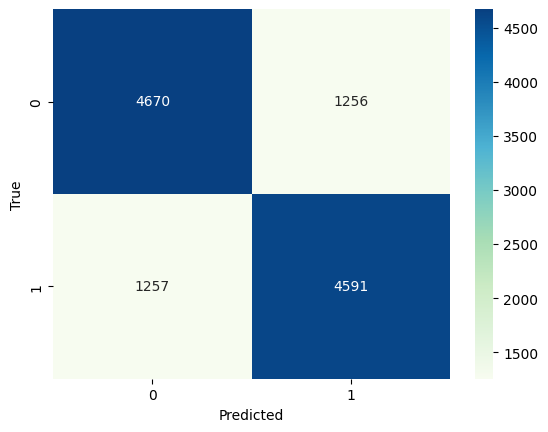

In [315]:
from sklearn.metrics import confusion_matrix
tabla=confusion_matrix(y_test_grid, y_pred_grid)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [111]:
y_pred_grid = gridcv.predict(test_sin_cuali)

In [112]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred_grid})

In [113]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [114]:
prediccion.to_csv('/content/sample_data/prediccion_grid_basico.csv', index = False)

# Probamos la diferencia haciendo una normalizacion y balanceo

In [316]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [317]:
a = reservas_sin_cuali.drop(['is_canceled'], axis=1)
b = reservas_sin_cuali['is_canceled']

In [318]:
# Normalización Min-Max en los datos de entrenamiento
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(a)

In [319]:
# Balanceo de clases (sobremuestreo de la clase minoritaria)
class_0 = X_train_normalized[b == 0]
class_1 = X_train_normalized[b == 1]

class_1_oversampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)

X_train_balanced = np.vstack((class_0, class_1_oversampled))
y_train_balanced = np.hstack((b[b == 0], np.ones(len(class_0))))

In [320]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

# Definimos un árbol de decisión con hiperparámetros
clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Realizar la búsqueda de hiperparámetros en los datos de entrenamiento balanceados
grid_search.fit(X_train_grid, y_train_grid)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [131]:
# Obtener el mejor modelo y sus hiperparámetros
best_params = grid_search.best_params_

print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [322]:
# Realizar predicciones en los datos de prueba después de normalizarlos
#X_test_normalized = scaler.transform(X_test)
y_pred = grid_search.predict(X_test_grid)

accuracy = accuracy_score(y_test_grid, y_pred)
precision = precision_score(y_test_grid, y_pred)
recall = recall_score(y_test_grid, y_pred)
f1 = f1_score(y_test_grid, y_pred)
roc_auc = roc_auc_score(y_test_grid, y_pred)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.8911490291670169
Precisión: 0.8713968957871396
Recuperación: 0.9192982456140351
F1-Score: 0.8947068867387593
AUC-ROC: 0.8909752391804951


In [134]:
# Realizar predicciones en los datos de prueba después de normalizarlos
#X_test_normalized = scaler.transform(X_test)
y_pred = grid_search.predict(X_test_grid)

accuracy = accuracy_score(y_test_grid, y_pred)
precision = precision_score(y_test_grid, y_pred)
recall = recall_score(y_test_grid, y_pred)
f1 = f1_score(y_test_grid, y_pred)
roc_auc = roc_auc_score(y_test_grid, y_pred)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)



Exactitud: 0.888963604269984
Precisión: 0.8674755751654586
Recuperación: 0.9197994987468672
F1-Score: 0.8928716243613657
AUC-ROC: 0.8887732270459641


# Queremos ver la diferencia de puntaje segun el hiperparametro scoring

In [160]:
'''score = pd.DataFrame()

lista_scorings = ['f1','accuracy','recall','precision','roc_auc','neg_log_loss','neg_mean_absolute_error','neg_mean_squared_error','r2']

X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

for k in lista_scorings:

# Definimos un árbol de decisión con hiperparámetros
  clf = DecisionTreeClassifier(random_state=42)

  param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
  }


  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=k, n_jobs=-1)

  # Realizar la búsqueda de hiperparámetros en los datos de entrenamiento balanceados
  grid_search.fit(X_train_grid, y_train_grid)

  y_pred = grid_search.predict(X_test_grid)

  new_row = {'scoring': k, "score": f1_score(y_test_grid, y_pred), "best_params": grid_search.best_params_}
  score = score.append(new_row, ignore_index=True)'''

'score = pd.DataFrame()\n\nlista_scorings = [\'f1\',\'accuracy\',\'recall\',\'precision\',\'roc_auc\',\'neg_log_loss\',\'neg_mean_absolute_error\',\'neg_mean_squared_error\',\'r2\']\n\nX_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)\n\nfor k in lista_scorings:\n\n# Definimos un árbol de decisión con hiperparámetros\n  clf = DecisionTreeClassifier(random_state=42)\n\n  param_grid = {\n    \'criterion\': [\'gini\', \'entropy\'],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n  }\n\n\n  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=k, n_jobs=-1)\n\n  # Realizar la búsqueda de hiperparámetros en los datos de entrenamiento balanceados\n  grid_search.fit(X_train_grid, y_train_grid)\n\n  y_pred = grid_search.predict(X_test_grid)\n\n  new_row = {\'scoring\': k, "score": f1_score(y_test_grid, y_pred), "best_params": grid_s

In [150]:
score.head(10)

,scoring,score,best_params
0,f1,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."
1,accuracy,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."
2,recall,0.892863,"{'criterion': 'gini', 'max_depth': 30, 'min_sa..."
3,precision,0.877939,"{'criterion': 'entropy', 'max_depth': None, 'm..."
4,roc_auc,0.867572,"{'criterion': 'entropy', 'max_depth': 20, 'min..."
5,neg_log_loss,0.834922,"{'criterion': 'gini', 'max_depth': 10, 'min_sa..."
6,neg_mean_absolute_error,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."
7,neg_mean_squared_error,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."
8,r2,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."


In [151]:
score[score['score'].max() == score['score']]

,scoring,score,best_params
0,f1,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."
1,accuracy,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."
6,neg_mean_absolute_error,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."
7,neg_mean_squared_error,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."
8,r2,0.892872,"{'criterion': 'entropy', 'max_depth': None, 'm..."


como dan lo mismo varios scorings utilizo f1 score

In [323]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['entropy'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train_grid, y_train_grid)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [2]},
             scoring='f1')

In [156]:
y_pred = grid_search.predict(X_test_grid)

accuracy = accuracy_score(y_test_grid, y_pred)
precision = precision_score(y_test_grid, y_pred)
recall = recall_score(y_test_grid, y_pred)
f1 = f1_score(y_test_grid, y_pred)
roc_auc = roc_auc_score(y_test_grid, y_pred)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)


Exactitud: 0.888963604269984
Precisión: 0.8674755751654586
Recuperación: 0.9197994987468672
F1-Score: 0.8928716243613657
AUC-ROC: 0.8887732270459641


In [324]:
y_pred = grid_search.predict(X_test_grid)

accuracy = accuracy_score(y_test_grid, y_pred)
precision = precision_score(y_test_grid, y_pred)
recall = recall_score(y_test_grid, y_pred)
f1 = f1_score(y_test_grid, y_pred)
roc_auc = roc_auc_score(y_test_grid, y_pred)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Exactitud: 0.8911490291670169
Precisión: 0.8713968957871396
Recuperación: 0.9192982456140351
F1-Score: 0.8947068867387593
AUC-ROC: 0.8909752391804951


In [325]:
y_pred = gridcv.predict(test_sin_cuali)

In [327]:
prediccion = pd.DataFrame({"id": test['id'], "is_canceled": y_pred})

In [328]:
prediccion.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [330]:
prediccion.to_csv('/content/sample_data/prediccion_grid_hiperparametros_balanceo.csv', index = False)